Since we have a continuous target variable, and not a categorical, we’re going to use regression as the predictive model technique. In regression, the system predicts the closing price of stock of a company, and in classification, the system predicts whether the closing price of stock will increase or decrease the next day.

Importing all libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

Loading all data into a pandas table

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv", sep=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Get the number of trading days

In [3]:
print(df.shape)

(2845, 7)


In [4]:
#Here we could have changing the intervall we're looking at. But we think we get a better prediction with using all 
# the data avalible.
#df = df.iloc[2592:]
#df.head()

Changing data to DateTime

In [5]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

Visulaize the close price data

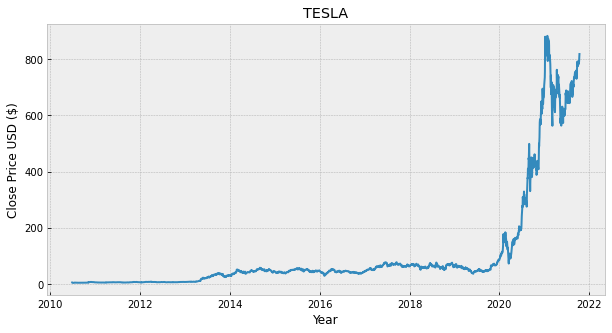

In [6]:
plt.figure(figsize=(10,5))
plt.title('TESLA')
plt.xlabel('Year')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

Get the close price

In [7]:
df = df[['Close']]
df.head(4)

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840


In [8]:
future_days = 25 # variable to predict 'x' days out into the future
#New column (target) shifted 'x' unit/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
Date,,
2021-10-11,791.940002,NaN
2021-10-12,805.719971,NaN
2021-10-13,811.080017,NaN
2021-10-14,818.320007,NaN


Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days

In [9]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  4.778   ]
 [  4.766   ]
 [  4.392   ]
 ...
 [752.919983]
 [753.869995]
 [754.859985]]


C:\Users\vetle\AppData\Local\Temp/ipykernel_20844/94911651.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days

In [10]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  4.252      4.09       3.918    ... 805.719971 811.080017 818.320007]


Split the data into 75% training and 25% testing

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Create the linear regression model

In [12]:
lr = LinearRegression().fit(x_train, y_train)

Get the last 'x' rows of the feature data set

In [13]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\vetle\AppData\Local\Temp/ipykernel_20844/3450743164.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[714.630005],
       [699.099976],
       [713.76001 ],
       [709.98999 ],
       [707.820007],
       [722.25    ],
       [717.169983],
       [686.169983],
       [665.710022],
       [688.98999 ],
       [673.469971],
       [680.26001 ],
       [706.299988],
       [708.48999 ],
       [711.200012],
       [701.159973],
       [711.919983],
       [730.909973],
       [735.719971],
       [734.090027],
       [732.390015],
       [733.570007],
       [752.919983],
       [753.869995],
       [754.859985]])

Show the model linear regression prediction

In [14]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[739.7156576  723.70980371 738.81900681 734.93347708 732.69700793
 747.5691218  742.33345805 710.38364837 689.29681418 713.29005763
 697.29452043 704.29259958 731.13041703 733.38751855 736.18057297
 725.832917   736.92260318 756.4944279  761.45179953 759.77191564
 758.01981694 759.23596274 779.17880307 780.15792251 781.17824484]


Visualize the data

C:\Users\vetle\AppData\Local\Temp/ipykernel_20844/4076704042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<IPython.core.display.Javascript object>


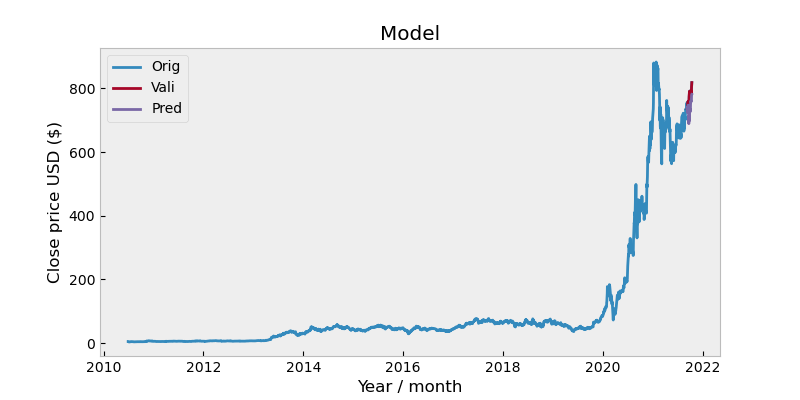

In [15]:
%matplotlib notebook
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Year / month')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.grid()
plt.legend(['Orig','Vali', 'Pred'])
plt.show()

In [16]:
valid.head()

,Close,Prediction,Predictions
Date,,,
2021-09-10,736.270020,NaN,739.715658
2021-09-13,743.000000,NaN,723.709804
2021-09-14,744.489990,NaN,738.819007
2021-09-15,755.830017,NaN,734.933477
2021-09-16,756.989990,NaN,732.697008


In [17]:
valid.tail()

,Close,Prediction,Predictions
Date,,,
2021-10-08,785.489990,NaN,758.019817
2021-10-11,791.940002,NaN,759.235963
2021-10-12,805.719971,NaN,779.178803
2021-10-13,811.080017,NaN,780.157923
2021-10-14,818.320007,NaN,781.178245


Input date and output is actual and predicted price of that stock.

In [18]:
date = input('Enter a date (yyyy-mm-dd) > (2021-09-10) here: ')
predicted_close_value = float('%.2f' % (valid.loc[date]['Predictions']))
actual_close_value = float('%.2f' % (valid.loc[date]['Close']))
offset_from_valid = abs(predicted_close_value / actual_close_value)
offset_percent_from_valid = ('%.2f' % (offset_from_valid*100))
print(f"Predicted closing price {date} is ${predicted_close_value}")
print(f"Actual closing price {date} price is ${actual_close_value}")
print(f"Prediction score {date} is {offset_percent_from_valid}%")

Enter a date (yyyy-mm-dd) > (2021-09-10) here: 2021-09-14
Predicted closing price 2021-09-14 is $738.82
Actual closing 2021-09-14 price is $744.49
Prediction score 2021-09-14 is 99.24%
